# Per residue changes of TCR CDRs between apo and holo structures

## Introduction

In this notebook, we look if there are certain residue positions that move more than others in the TCR CDR loops. We use these visualisations to further characterise the movement of CDR loops as either rigid-body, where the entire loop moves as one unit, or plastic, where the loop can mold to its target.

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')

In [3]:
DATA_DIR = '../data/processed/apo-holo-tcr-pmhc-class-I-comparisons'

## Loading Data

In [4]:
results = pd.read_csv(os.path.join(DATA_DIR, 'tcr_per_res_apo_holo_loop_align.csv'))
results

,complex_id,structure_x_name,structure_y_name,chain_type,cdr,residue_name,residue_seq_id,residue_insert_code,rmsd,ca_distance,chi_angle_change,com_distance
0,3qdg_D-E-C-A-B_tcr_pmhc,3qdg_D-E-C-A-B_tcr_pmhc.pdb,3qeu_A-B_tcr.pdb,alpha_chain,1,ASP,27,NaN,4.922807,2.215234,-1.001709,3.836500
1,3qdg_D-E-C-A-B_tcr_pmhc,3qdg_D-E-C-A-B_tcr_pmhc.pdb,3qeu_A-B_tcr.pdb,alpha_chain,1,ARG,28,NaN,7.683418,2.322292,-1.010462,6.119157
2,3qdg_D-E-C-A-B_tcr_pmhc,3qdg_D-E-C-A-B_tcr_pmhc.pdb,3qeu_A-B_tcr.pdb,alpha_chain,1,GLY,29,NaN,0.657793,0.718576,NaN,0.452200
3,3qdg_D-E-C-A-B_tcr_pmhc,3qdg_D-E-C-A-B_tcr_pmhc.pdb,3qeu_A-B_tcr.pdb,alpha_chain,1,SER,36,NaN,1.224430,0.404912,-2.505061,0.866544
4,3qdg_D-E-C-A-B_tcr_pmhc,3qdg_D-E-C-A-B_tcr_pmhc.pdb,3qeu_A-B_tcr.pdb,alpha_chain,1,GLN,37,NaN,1.133408,0.467132,0.667185,0.798590
...,...,...,...,...,...,...,...,...,...,...,...,...
6228,7rtr_D-E-C-A-B_tcr_pmhc,7n1d_A-B_tcr.pdb,7rtr_D-E-C-A-B_tcr_pmhc.pdb,beta_chain,3,ASP,109,NaN,0.507077,0.180564,0.198956,0.208659
6229,7rtr_D-E-C-A-B_tcr_pmhc,7n1d_A-B_tcr.pdb,7rtr_D-E-C-A-B_tcr_pmhc.pdb,beta_chain,3,ILE,114,NaN,2.164965,0.158682,3.679442,0.829175
6230,7rtr_D-E-C-A-B_tcr_pmhc,7n1d_A-B_tcr.pdb,7rtr_D-E-C-A-B_tcr_pmhc.pdb,beta_chain,3,GLU,115,NaN,1.577728,0.195887,3.091039,0.995351
6231,7rtr_D-E-C-A-B_tcr_pmhc,7n1d_A-B_tcr.pdb,7rtr_D-E-C-A-B_tcr_pmhc.pdb,beta_chain,3,GLN,116,NaN,0.204783,0.197683,-0.014126,0.166472


In [5]:
summary_df = pd.read_csv('../data/processed/apo-holo-tcr-pmhc-class-I/apo_holo_summary.csv')

ids = summary_df['file_name'].str.replace('.pdb', '', regex=False)
ids.name = 'id'
summary_df = summary_df.set_index(ids)

summary_df

,file_name,pdb_id,structure_type,state,alpha_chain,beta_chain,antigen_chain,mhc_chain1,mhc_chain2,cdr_sequences_collated,peptide_sequence,mhc_slug
id,,,,,,,,,,,,
1ao7_D-E-C-A-B_tcr_pmhc,1ao7_D-E-C-A-B_tcr_pmhc.pdb,1ao7,tcr_pmhc,holo,D,E,C,A,B,DRGSQS-IYSNGD-AVTTDSWGKLQ-MNHEY-SVGAGI-ASRPGLA...,LLFGYPVYV,hla_a_02_01
1b0g_C-A-B_pmhc,1b0g_C-A-B_pmhc.pdb,1b0g,pmhc,apo,NaN,NaN,C,A,B,NaN,ALWGFFPVL,hla_a_02_01
1b0g_F-D-E_pmhc,1b0g_F-D-E_pmhc.pdb,1b0g,pmhc,apo,NaN,NaN,F,D,E,NaN,ALWGFFPVL,hla_a_02_01
1bd2_D-E-C-A-B_tcr_pmhc,1bd2_D-E-C-A-B_tcr_pmhc.pdb,1bd2,tcr_pmhc,holo,D,E,C,A,B,NSMFDY-ISSIKDK-AAMEGAQKLV-MNHEY-SVGAGI-ASSYPGG...,LLFGYPVYV,hla_a_02_01
1bii_P-A-B_pmhc,1bii_P-A-B_pmhc.pdb,1bii,pmhc,apo,NaN,NaN,P,A,B,NaN,RGPGRAFVTI,h2_dd
...,...,...,...,...,...,...,...,...,...,...,...,...
7rtd_C-A-B_pmhc,7rtd_C-A-B_pmhc.pdb,7rtd,pmhc,apo,NaN,NaN,C,A,B,NaN,YLQPRTFLL,hla_a_02_01
7rtr_D-E-C-A-B_tcr_pmhc,7rtr_D-E-C-A-B_tcr_pmhc.pdb,7rtr,tcr_pmhc,holo,D,E,C,A,B,DRGSQS-IYSNGD-AVNRDDKII-SEHNR-FQNEAQ-ASSPDIEQY,YLQPRTFLL,hla_a_02_01
8gvb_A-B-P-H-L_tcr_pmhc,8gvb_A-B-P-H-L_tcr_pmhc.pdb,8gvb,tcr_pmhc,holo,A,B,P,H,L,YGATPY-YFSGDTLV-AVGFTGGGNKLT-SEHNR-FQNEAQ-ASSD...,RYPLTFGW,hla_a_24_02


In [6]:
results = results.merge(
    summary_df[['cdr_sequences_collated', 'peptide_sequence', 'mhc_slug']],
    how='left',
    left_on='complex_id',
    right_index=True,
)

In [7]:
results = results.merge(
    summary_df[['file_name', 'pdb_id', 'structure_type', 'state', 'alpha_chain', 'beta_chain', 'antigen_chain', 'mhc_chain1', 'mhc_chain2']],
    how='left',
    left_on='structure_x_name',
    right_on='file_name',
).merge(
    summary_df[['file_name', 'pdb_id', 'structure_type', 'state', 'alpha_chain', 'beta_chain', 'antigen_chain', 'mhc_chain1', 'mhc_chain2']],
    how='left',
    left_on='structure_y_name',
    right_on='file_name',
    suffixes=('_x', '_y')
)

In [8]:
results['comparison'] = results['state_x'] + '-' + results['state_y']
results['comparison'] = results['comparison'].map(lambda entry: 'apo-holo' if entry == 'holo-apo' else entry)

In [9]:
results['structure_comparison'] = results.apply(
    lambda row: '-'.join(sorted([row.structure_x_name, row.structure_y_name])),
    axis='columns',
)
results = results.drop_duplicates(['structure_comparison',
                                   'chain_type',
                                   'cdr',
                                   'residue_name',
                                   'residue_seq_id',
                                   'residue_insert_code'])

In [10]:
results = results.groupby(['cdr_sequences_collated',
                           'comparison',
                           'chain_type',
                           'cdr',
                           'residue_name',
                           'residue_seq_id',
                           'residue_insert_code'], dropna=False)[['ca_distance', 'rmsd', 'chi_angle_change', 'com_distance']].mean().reset_index()

In [11]:
results['resi'] = results['residue_seq_id'].apply(str) + results['residue_insert_code'].fillna('')

In [12]:
results = results.query("comparison == 'apo-holo'")

In [13]:
results

,cdr_sequences_collated,comparison,chain_type,cdr,residue_name,residue_seq_id,residue_insert_code,ca_distance,rmsd,chi_angle_change,com_distance,resi
0,ATGYPS-ATKADDK-ALSDPVNDMR-SGHAT-FQNNGV-ASSLRGR...,apo-holo,alpha_chain,1,ALA,27,NaN,0.505979,0.727144,NaN,0.518151,27
1,ATGYPS-ATKADDK-ALSDPVNDMR-SGHAT-FQNNGV-ASSLRGR...,apo-holo,alpha_chain,1,GLY,29,NaN,0.914903,0.930089,NaN,0.854811,29
2,ATGYPS-ATKADDK-ALSDPVNDMR-SGHAT-FQNNGV-ASSLRGR...,apo-holo,alpha_chain,1,PRO,37,NaN,0.423195,0.503712,-0.025853,0.389174,37
3,ATGYPS-ATKADDK-ALSDPVNDMR-SGHAT-FQNNGV-ASSLRGR...,apo-holo,alpha_chain,1,SER,38,NaN,0.401867,0.469748,-0.121133,0.433753,38
4,ATGYPS-ATKADDK-ALSDPVNDMR-SGHAT-FQNNGV-ASSLRGR...,apo-holo,alpha_chain,1,THR,28,NaN,0.510473,1.928260,3.726374,0.564129,28
...,...,...,...,...,...,...,...,...,...,...,...,...
1442,YSGSPE-HISR-ALSGFNNAGNMLT-SGHAT-FQNNGV-ASSLGGA...,apo-holo,beta_chain,3,LEU,108,NaN,1.022477,1.809773,-1.412711,1.135954,108
1443,YSGSPE-HISR-ALSGFNNAGNMLT-SGHAT-FQNNGV-ASSLGGA...,apo-holo,beta_chain,3,SER,106,NaN,1.676174,1.573190,-0.192425,1.510255,106
1444,YSGSPE-HISR-ALSGFNNAGNMLT-SGHAT-FQNNGV-ASSLGGA...,apo-holo,beta_chain,3,SER,107,NaN,1.091206,1.232135,2.393467,0.895901,107
1445,YSGSPE-HISR-ALSGFNNAGNMLT-SGHAT-FQNNGV-ASSLGGA...,apo-holo,beta_chain,3,THR,115,NaN,1.236042,1.347615,-0.280349,1.218896,115


## Visualising Results

### Ca movement

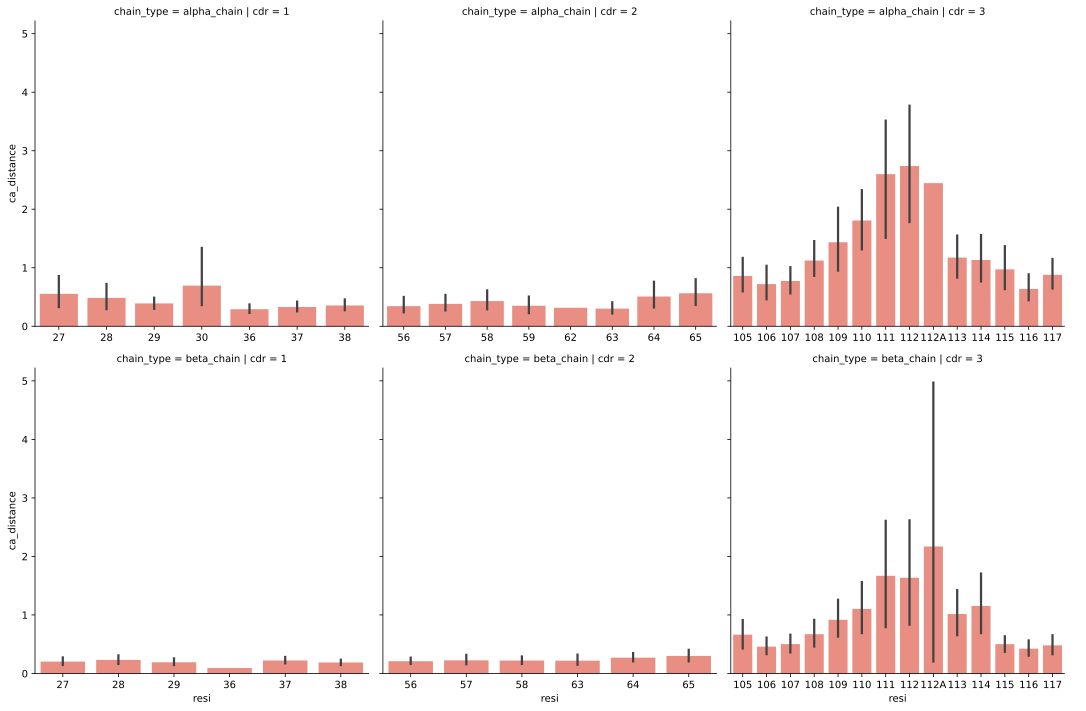

In [14]:
sns.catplot(results.sort_values(['resi', 'chain_type', 'cdr']),
            x='resi', y='ca_distance',
            row='chain_type', col='cdr',
            color='salmon',
            sharex=False,
            kind='bar')

### Residue RMSD difference

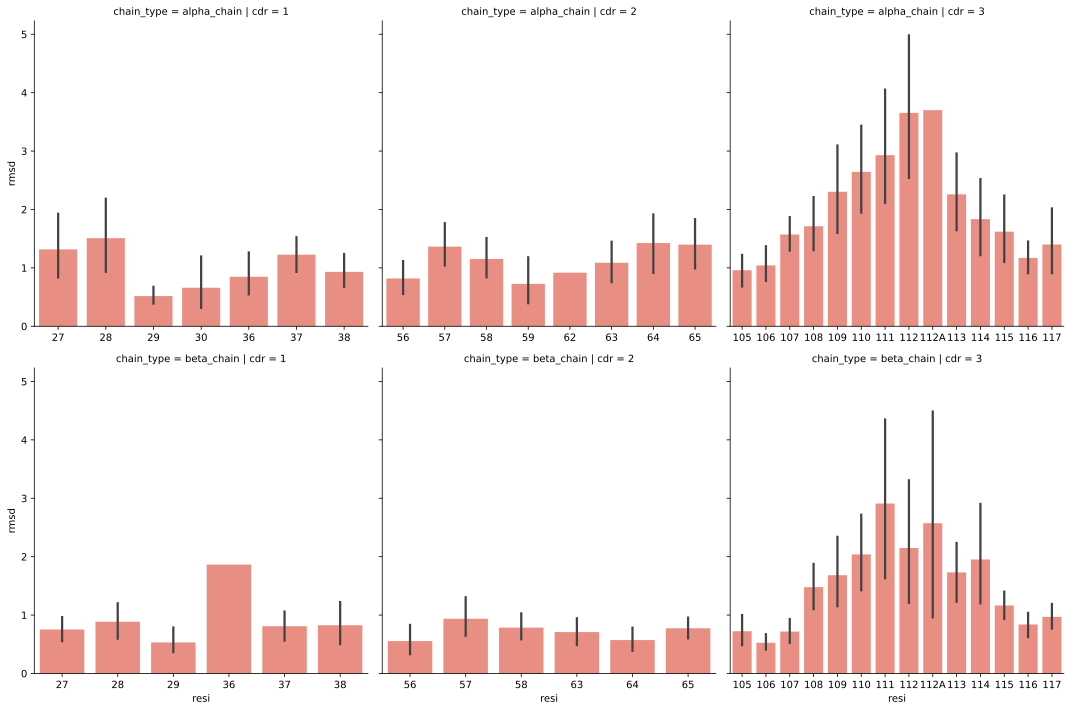

In [15]:
sns.catplot(results.sort_values(['resi', 'chain_type', 'cdr']),
            x='resi', y='rmsd',
            row='chain_type', col='cdr',
            color='salmon',
            sharex=False,
            kind='bar')

### Centre of Mass Changes

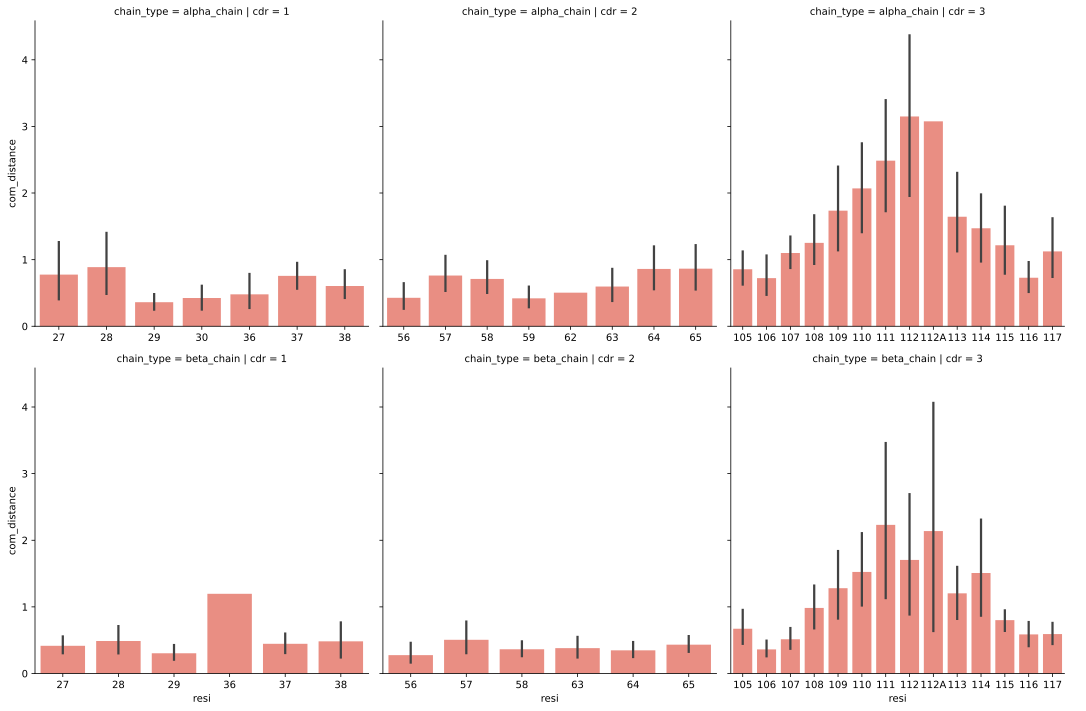

In [16]:
sns.catplot(results.sort_values(['resi', 'chain_type', 'cdr']),
            x='resi', y='com_distance',
            row='chain_type', col='cdr',
            color='salmon',
            sharex=False,
            kind='bar')

### Comparing Residue Identity to movment

In [17]:
results['aa_type'] = results['residue_name'].map({
    'ARG': 'Charged',
    'HIS': 'Charged',
    'LYS': 'Charged',
    'ASP': 'Charged',
    'GLU': 'Charged',
    'SER': 'Polar',
    'THR': 'Polar',
    'ASN': 'Polar',
    'GLN': 'Polar',
    'CYS': 'Special',
    'GLY': 'Special',
    'PRO': 'Special',
    'ALA': 'Hydrophobic',
    'VAL': 'Hydrophobic',
    'ILE': 'Hydrophobic',
    'LEU': 'Hydrophobic',
    'MET': 'Hydrophobic',
    'PHE': 'Hydrophobic',
    'TYR': 'Hydrophobic',
    'TRP': 'Hydrophobic',
})

In [18]:
aa_means = results.groupby('residue_name')['rmsd'].mean().to_dict()
results['aa_mean'] = results['residue_name'].map(aa_means)

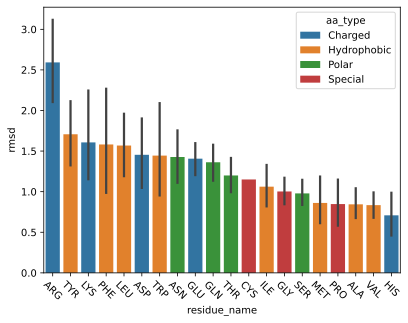

In [19]:
sns.barplot(results.sort_values('aa_mean', ascending=False), y='rmsd', x='residue_name', hue='aa_type')
plt.xticks(rotation=-45)
print()

In [20]:
num_side_chain_heavy_atoms = results['residue_name'].map({
    'ARG': 7,
    'HIS': 7,
    'LYS': 5,
    'ASP': 4,
    'GLU': 5,
    'SER': 2,
    'THR': 3,
    'ASN': 4,
    'GLN': 5,
    'CYS': 2,
    'GLY': 0,
    'PRO': 3,
    'ALA': 1,
    'VAL': 3,
    'ILE': 4,
    'LEU': 4,
    'MET': 4,
    'PHE': 7,
    'TYR': 8,
    'TRP': 10,
})

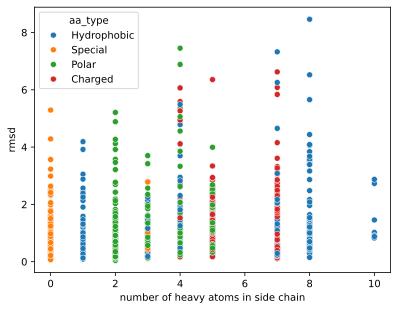

In [21]:
sns.scatterplot(x=num_side_chain_heavy_atoms, y=results['rmsd'], hue=results['aa_type'])
plt.xlabel('number of heavy atoms in side chain')
plt.show()

### Measuring differences in $\chi$-angles

Do the side chains change conformation as well?

In [22]:
results['chi_angle_change_mag'] = results['chi_angle_change'].apply(np.abs)
results['chi_angle_change_deg_mag'] = results['chi_angle_change_mag'].apply(np.degrees)

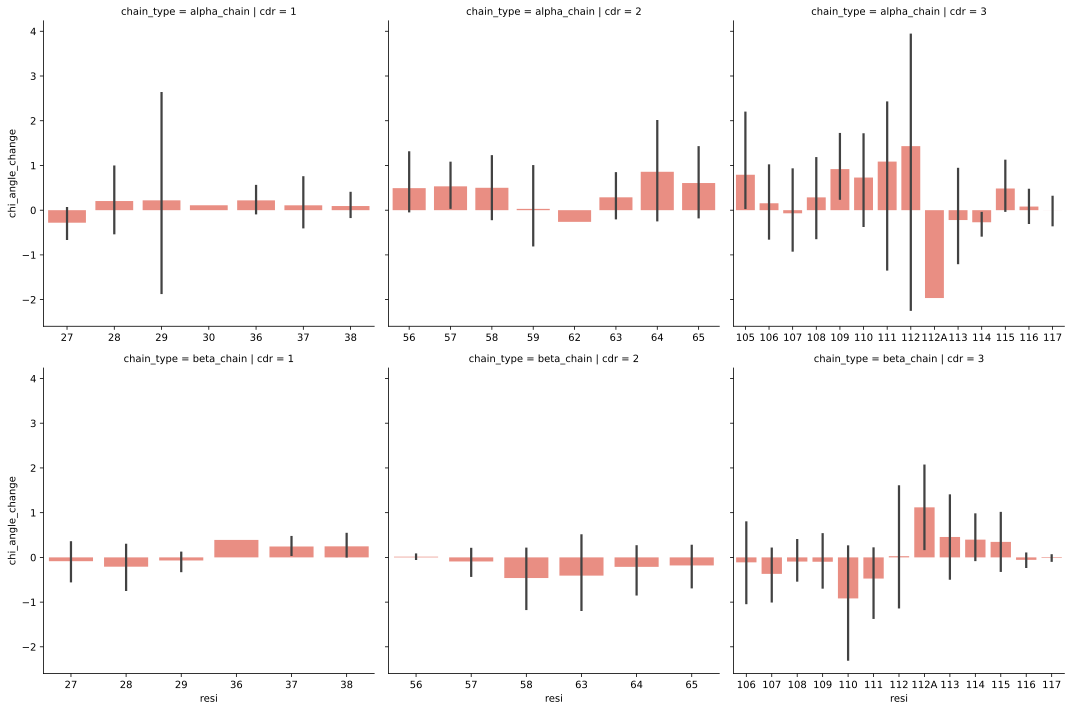

In [23]:
sns.catplot(results.sort_values(['resi', 'chain_type', 'cdr']),
            x='resi', y='chi_angle_change',
            row='chain_type', col='cdr',
            color='salmon',
            sharex=False,
            kind='bar')

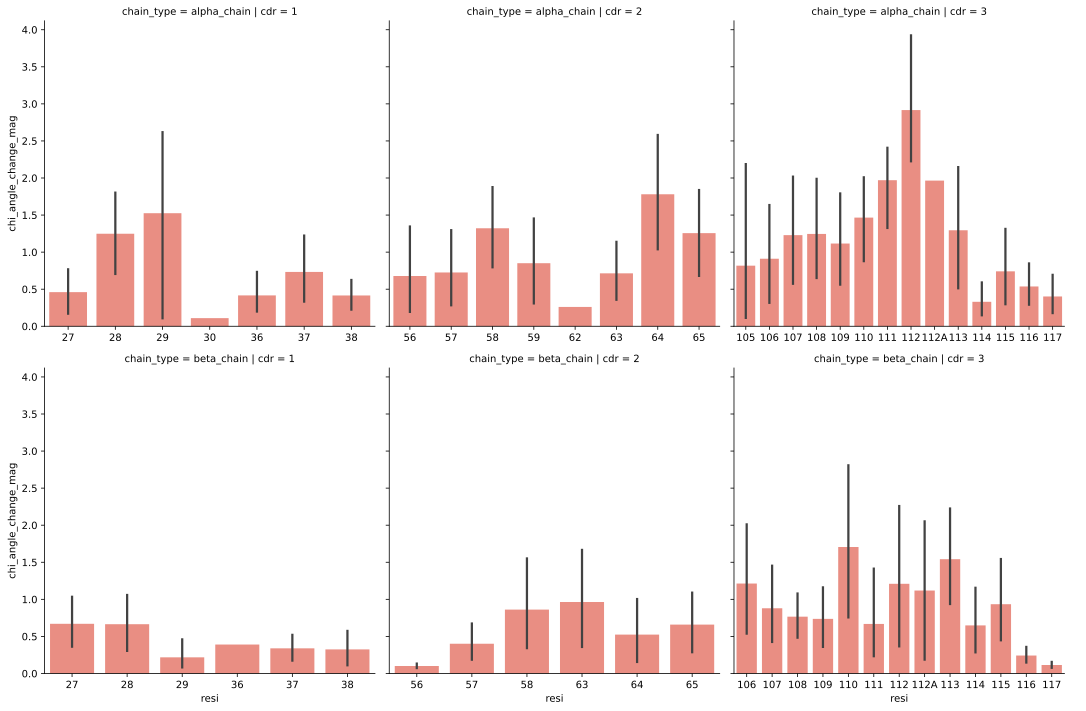

In [24]:
sns.catplot(results.sort_values(['resi', 'chain_type', 'cdr']),
            x='resi', y='chi_angle_change_mag',
            row='chain_type', col='cdr',
            color='salmon',
            sharex=False,
            kind='bar')

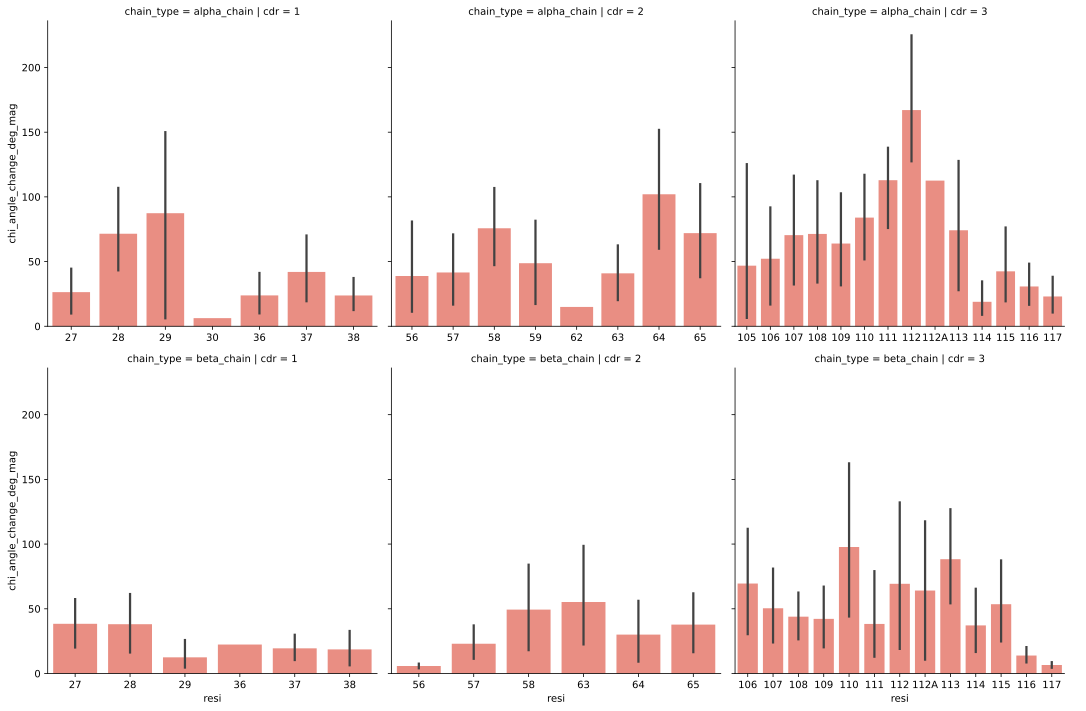

In [25]:
sns.catplot(results.sort_values(['resi', 'chain_type', 'cdr']),
            x='resi', y='chi_angle_change_deg_mag',
            row='chain_type', col='cdr',
            color='salmon',
            sharex=False,
            kind='bar')

## Conclusion

From these results, it seems that the CDR-3 loops undergo plastic deformation but the CDR-1 and CDR-2 loops act as rigid bodies when contacting MHC molecules. This was determined by the flat profiles of the CDR-1 and -2 loops and the peaked, normal-like, distributions of CDR-3 loops (both CDR-A3 and CDR-B3).